In [1]:
from base import *

/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.16) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming your data is stored in a csv file named 'data.csv'
df = pd.read_csv(r'/data/chenxi/llm-feature-engeneering/dataset/circor.csv')
df=df.drop(columns=['Patient ID','Recording locations:','Additional ID'])
df_clean = df.copy()
df['Murmur locations'] = df['Murmur locations'].str.split('+')
locations = ['PV', 'TV', 'AV', 'MV']
for location in locations:
    df[location] = df['Murmur locations'].apply(lambda x: 1 if x is not np.nan and location in x else 0)
df.drop('Murmur locations', axis=1, inplace=True)

In [3]:
# 1. Map the Age feature
age_mapping = {'Neonate': 1, 'Infant': 2, 'Child': 3, 'Adolescent': 4, 'Young adult': 5}
df_clean['Age'] = df_clean['Age'].map(age_mapping)
df_clean['Age'].fillna(-1, inplace=True)

# 2. Map the Sex feature
le = LabelEncoder()
df_clean['Sex'] = le.fit_transform(df_clean['Sex'])

# 3. Map the Pregnancy status feature
df_clean['Pregnancy status'] = df_clean['Pregnancy status'].map({False: 0, True: 1})

# 4. Handle missing values in Height and Weight
df_clean['Height'].fillna((df_clean['Height'].mean()), inplace=True)
df_clean['Weight'].fillna((df_clean['Weight'].mean()), inplace=True)

# 5. Map the Murmur feature
df_clean['Murmur'] = df_clean['Murmur'].map({'Present': 1, 'Absent': 0, 'Unknown': 2})

# 6. Handle the 'Murmur locations' feature
df_clean['Murmur locations'] = df_clean['Murmur locations'].str.split('+')
locations = ['PV', 'TV', 'AV', 'MV']
for location in locations:
    df_clean[location] = df_clean['Murmur locations'].apply(lambda x: 1 if x is not np.nan and location in x else 0)
df_clean.drop('Murmur locations', axis=1, inplace=True)

# 7. Map the 'Most audible location' feature
df_clean['Most audible location'] = df_clean['Most audible location'].map({np.nan: 0, 'PV': 1, 'TV': 2, 'AV': 3, 'MV': 4})

# 8. Map the Outcome feature
df_clean['Outcome'] = df_clean['Outcome'].map({'Normal': 0, 'Abnormal': 1})

# 9. Map the Campaign feature
df_clean['Campaign'] = df_clean['Campaign'].map({'CC2014': 0, 'CC2015': 1})

# 10. Map other string features
string_features = ['Systolic murmur timing', 'Systolic murmur shape', 'Systolic murmur grading', 'Systolic murmur pitch', 'Systolic murmur quality', 
                   'Diastolic murmur timing', 'Diastolic murmur shape', 'Diastolic murmur grading', 'Diastolic murmur pitch', 'Diastolic murmur quality']
for feature in string_features:
    df_clean[feature] = df_clean[feature].astype('category')
    df_clean[feature] = df_clean[feature].cat.codes
    df_clean[feature].fillna(-1, inplace=True)

In [4]:
df_clean.head(5)

,Age,Sex,Height,Weight,Pregnancy status,Murmur,Most audible location,Systolic murmur timing,Systolic murmur shape,Systolic murmur grading,...,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Outcome,Campaign,PV,TV,AV,MV
0,3.0,0,98.0,15.9,0,0,0,-1,-1,-1,...,-1,-1,-1,-1,1,1,0,0,0,0
1,3.0,0,103.0,13.1,0,1,2,1,2,2,...,-1,-1,-1,-1,1,1,1,1,1,1
2,3.0,1,115.0,19.1,0,2,0,-1,-1,-1,...,-1,-1,-1,-1,1,1,0,0,0,0
3,3.0,1,98.0,15.9,0,1,2,1,3,0,...,-1,-1,-1,-1,1,1,0,1,0,0
4,3.0,1,87.0,11.2,0,1,1,0,3,1,...,-1,-1,-1,-1,1,1,1,1,1,1


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from transformers import BertModel, BertTokenizer

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000000),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
}


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 8.6
CUDA SETUP: Detected CUDA version 117
CUDA SETUP: Loading binary /data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda117.so...


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:147: UserWarning: /data/chenxi/anaconda3/envs/myenv did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:147: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('vs/workbench/api/node/extensionHostProcess')}
  warn(msg)
/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:147: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('module'), PosixPath('//matplotlib_inline.backend_inline')}
  warn(msg)
/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:147: UserWarning: Found duplicate ['libcudart.so', 'libcudart.so.11.0', 'libcuda

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import re
def get_matching_cols(df, regex):
    r = re.compile(regex)
    return( list( filter( r.match, df.columns) ) )

def get_embedding_cols(df):
    return get_matching_cols(df, "(vec_\d+)")

## ours


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
INFO:base:Downloading pre-trained model 'fine_tuned_model_circor1'


Processing seed 0...


INFO:base:Downloading tokenizer for 'fine_tuned_model_circor1'
INFO:base:Generating embedding vectors
Map: 100%|██████████| 602/602 [00:02<00:00, 216.63 examples/s]
INFO:base:Generating embedding vectors
Map: 100%|██████████| 189/189 [00:00<00:00, 301.00 examples/s]


Method: baseline | Model: Logistic Regression | accuracy: 0.6878306878306878
Method: baseline | Model: Logistic Regression | roc_auc: 0.7272932161370296
Method: baseline | Model: Random Forest | accuracy: 0.6296296296296297
Method: baseline | Model: Random Forest | roc_auc: 0.6840207347306737
Method: baseline | Model: AdaBoost | accuracy: 0.6666666666666666
Method: baseline | Model: AdaBoost | roc_auc: 0.7636353391931485
Method: baseline | Model: Gradient Boosting | accuracy: 0.7037037037037037
Method: baseline | Model: Gradient Boosting | roc_auc: 0.7337164750957854
Method: baseline | Model: Support Vector Machine | accuracy: 0.6931216931216931
Method: baseline | Model: Support Vector Machine | roc_auc: 0.7384494027496057
Method: baseline | Model: XGBoost | accuracy: 0.6507936507936508
Method: baseline | Model: XGBoost | roc_auc: 0.6972053189091729


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Method: SelectK | Model: Logistic Regression | accuracy: 0.8624338624338624
Method: SelectK | Model: Logistic Regression | roc_auc: 0.9386973180076629
Method: SelectK | Model: Random Forest | accuracy: 0.8677248677248677
Method: SelectK | Model: Random Forest | roc_auc: 0.9368379535722335
Method: SelectK | Model: AdaBoost | accuracy: 0.8835978835978836
Method: SelectK | Model: AdaBoost | roc_auc: 0.9348659003831418
Method: SelectK | Model: Gradient Boosting | accuracy: 0.873015873015873
Method: SelectK | Model: Gradient Boosting | roc_auc: 0.9498535046202389
Method: SelectK | Model: Support Vector Machine | accuracy: 0.8042328042328042
Method: SelectK | Model: Support Vector Machine | roc_auc: 0.9230335812485914
Method: SelectK | Model: XGBoost | accuracy: 0.8624338624338624
Method: SelectK | Model: XGBoost | roc_auc: 0.9559386973180076


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Method: PCA | Model: Logistic Regression | accuracy: 0.8518518518518519
Method: PCA | Model: Logistic Regression | roc_auc: 0.9115393283750283
Method: PCA | Model: Random Forest | accuracy: 0.8465608465608465
Method: PCA | Model: Random Forest | roc_auc: 0.915314401622718
Method: PCA | Model: AdaBoost | accuracy: 0.8571428571428571
Method: PCA | Model: AdaBoost | roc_auc: 0.90973630831643
Method: PCA | Model: Gradient Boosting | accuracy: 0.8306878306878307
Method: PCA | Model: Gradient Boosting | roc_auc: 0.9043272481406356
Method: PCA | Model: Support Vector Machine | accuracy: 0.8571428571428571
Method: PCA | Model: Support Vector Machine | roc_auc: 0.9274284426414243


INFO:base:Downloading pre-trained model 'fine_tuned_model_circor2'


Method: PCA | Model: XGBoost | accuracy: 0.8465608465608465
Method: PCA | Model: XGBoost | roc_auc: 0.9043272481406356
Processing seed 1...


INFO:base:Downloading tokenizer for 'fine_tuned_model_circor2'
INFO:base:Generating embedding vectors
Map: 100%|██████████| 602/602 [00:01<00:00, 304.23 examples/s]
INFO:base:Generating embedding vectors
Map: 100%|██████████| 189/189 [00:00<00:00, 304.79 examples/s]


Method: baseline | Model: Logistic Regression | accuracy: 0.671957671957672
Method: baseline | Model: Logistic Regression | roc_auc: 0.7348264277715566
Method: baseline | Model: Random Forest | accuracy: 0.6243386243386243
Method: baseline | Model: Random Forest | roc_auc: 0.6517357222844344
Method: baseline | Model: AdaBoost | accuracy: 0.656084656084656
Method: baseline | Model: AdaBoost | roc_auc: 0.6963045912653976
Method: baseline | Model: Gradient Boosting | accuracy: 0.6507936507936508
Method: baseline | Model: Gradient Boosting | roc_auc: 0.6738521836506158
Method: baseline | Model: Support Vector Machine | accuracy: 0.6825396825396826
Method: baseline | Model: Support Vector Machine | roc_auc: 0.7344344904815231
Method: baseline | Model: XGBoost | accuracy: 0.5978835978835979
Method: baseline | Model: XGBoost | roc_auc: 0.6500559910414334


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Method: SelectK | Model: Logistic Regression | accuracy: 0.8412698412698413
Method: SelectK | Model: Logistic Regression | roc_auc: 0.9076147816349385
Method: SelectK | Model: Random Forest | accuracy: 0.8201058201058201
Method: SelectK | Model: Random Forest | roc_auc: 0.9049272116461367
Method: SelectK | Model: AdaBoost | accuracy: 0.8306878306878307
Method: SelectK | Model: AdaBoost | roc_auc: 0.9206047032474804
Method: SelectK | Model: Gradient Boosting | accuracy: 0.8095238095238095
Method: SelectK | Model: Gradient Boosting | roc_auc: 0.9211646136618141
Method: SelectK | Model: Support Vector Machine | accuracy: 0.798941798941799
Method: SelectK | Model: Support Vector Machine | roc_auc: 0.8957446808510637
Method: SelectK | Model: XGBoost | accuracy: 0.8095238095238095
Method: SelectK | Model: XGBoost | roc_auc: 0.9109742441209406


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Method: PCA | Model: Logistic Regression | accuracy: 0.8201058201058201
Method: PCA | Model: Logistic Regression | roc_auc: 0.8730123180291153
Method: PCA | Model: Random Forest | accuracy: 0.8095238095238095
Method: PCA | Model: Random Forest | roc_auc: 0.8722844344904814
Method: PCA | Model: AdaBoost | accuracy: 0.783068783068783
Method: PCA | Model: AdaBoost | roc_auc: 0.8664053751399776
Method: PCA | Model: Gradient Boosting | accuracy: 0.8148148148148148
Method: PCA | Model: Gradient Boosting | roc_auc: 0.8797872340425532
Method: PCA | Model: Support Vector Machine | accuracy: 0.8148148148148148
Method: PCA | Model: Support Vector Machine | roc_auc: 0.8690929451287793


INFO:base:Downloading pre-trained model 'fine_tuned_model_circor3'


Method: PCA | Model: XGBoost | accuracy: 0.8042328042328042
Method: PCA | Model: XGBoost | roc_auc: 0.8737961926091825
Processing seed 2...


INFO:base:Downloading tokenizer for 'fine_tuned_model_circor3'
INFO:base:Generating embedding vectors
Map: 100%|██████████| 602/602 [00:01<00:00, 315.10 examples/s]
INFO:base:Generating embedding vectors
Map: 100%|██████████| 189/189 [00:00<00:00, 291.01 examples/s]


Method: baseline | Model: Logistic Regression | accuracy: 0.6825396825396826
Method: baseline | Model: Logistic Regression | roc_auc: 0.6702531645569619
Method: baseline | Model: Random Forest | accuracy: 0.6137566137566137
Method: baseline | Model: Random Forest | roc_auc: 0.653452243958573
Method: baseline | Model: AdaBoost | accuracy: 0.6666666666666666
Method: baseline | Model: AdaBoost | roc_auc: 0.6618527042577674
Method: baseline | Model: Gradient Boosting | accuracy: 0.6455026455026455
Method: baseline | Model: Gradient Boosting | roc_auc: 0.693843498273878
Method: baseline | Model: Support Vector Machine | accuracy: 0.6825396825396826
Method: baseline | Model: Support Vector Machine | roc_auc: 0.6226121979286536
Method: baseline | Model: XGBoost | accuracy: 0.6455026455026455
Method: baseline | Model: XGBoost | roc_auc: 0.6947640966628308


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Method: SelectK | Model: Logistic Regression | accuracy: 0.8306878306878307
Method: SelectK | Model: Logistic Regression | roc_auc: 0.9186421173762946
Method: SelectK | Model: Random Forest | accuracy: 0.8201058201058201
Method: SelectK | Model: Random Forest | roc_auc: 0.9091484464902186
Method: SelectK | Model: AdaBoost | accuracy: 0.8095238095238095
Method: SelectK | Model: AdaBoost | roc_auc: 0.8909090909090909
Method: SelectK | Model: Gradient Boosting | accuracy: 0.798941798941799
Method: SelectK | Model: Gradient Boosting | roc_auc: 0.9047180667433832
Method: SelectK | Model: Support Vector Machine | accuracy: 0.8042328042328042
Method: SelectK | Model: Support Vector Machine | roc_auc: 0.9086306098964326
Method: SelectK | Model: XGBoost | accuracy: 0.8201058201058201
Method: SelectK | Model: XGBoost | roc_auc: 0.8985040276179517
Method: PCA | Model: Logistic Regression | accuracy: 0.8306878306878307
Method: PCA | Model: Logistic Regression | roc_auc: 0.8944764096662832
Method: 

INFO:base:Downloading pre-trained model 'fine_tuned_model_circor4'


Method: PCA | Model: XGBoost | accuracy: 0.783068783068783
Method: PCA | Model: XGBoost | roc_auc: 0.8634062140391254
Processing seed 3...


INFO:base:Downloading tokenizer for 'fine_tuned_model_circor4'
INFO:base:Generating embedding vectors
Map: 100%|██████████| 602/602 [00:02<00:00, 206.14 examples/s]
INFO:base:Generating embedding vectors
Map: 100%|██████████| 189/189 [00:00<00:00, 296.54 examples/s]


Method: baseline | Model: Logistic Regression | accuracy: 0.6666666666666666
Method: baseline | Model: Logistic Regression | roc_auc: 0.6807235663082438
Method: baseline | Model: Random Forest | accuracy: 0.6137566137566137
Method: baseline | Model: Random Forest | roc_auc: 0.6526097670250897
Method: baseline | Model: AdaBoost | accuracy: 0.6084656084656085
Method: baseline | Model: AdaBoost | roc_auc: 0.6479614695340502
Method: baseline | Model: Gradient Boosting | accuracy: 0.5873015873015873
Method: baseline | Model: Gradient Boosting | roc_auc: 0.6391129032258065
Method: baseline | Model: Support Vector Machine | accuracy: 0.671957671957672
Method: baseline | Model: Support Vector Machine | roc_auc: 0.6804995519713262
Method: baseline | Model: XGBoost | accuracy: 0.6084656084656085
Method: baseline | Model: XGBoost | roc_auc: 0.6580421146953405


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Method: SelectK | Model: Logistic Regression | accuracy: 0.8253968253968254
Method: SelectK | Model: Logistic Regression | roc_auc: 0.9232750896057348
Method: SelectK | Model: Random Forest | accuracy: 0.8359788359788359
Method: SelectK | Model: Random Forest | roc_auc: 0.9073700716845878
Method: SelectK | Model: AdaBoost | accuracy: 0.8571428571428571
Method: SelectK | Model: AdaBoost | roc_auc: 0.9150425627240143
Method: SelectK | Model: Gradient Boosting | accuracy: 0.8412698412698413
Method: SelectK | Model: Gradient Boosting | roc_auc: 0.9169466845878136
Method: SelectK | Model: Support Vector Machine | accuracy: 0.8148148148148148
Method: SelectK | Model: Support Vector Machine | roc_auc: 0.889896953405018
Method: SelectK | Model: XGBoost | accuracy: 0.8253968253968254
Method: SelectK | Model: XGBoost | roc_auc: 0.9002016129032258


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Method: PCA | Model: Logistic Regression | accuracy: 0.8042328042328042
Method: PCA | Model: Logistic Regression | roc_auc: 0.8764560931899641
Method: PCA | Model: Random Forest | accuracy: 0.7513227513227513
Method: PCA | Model: Random Forest | roc_auc: 0.8697916666666665
Method: PCA | Model: AdaBoost | accuracy: 0.8095238095238095
Method: PCA | Model: AdaBoost | roc_auc: 0.8506944444444444
Method: PCA | Model: Gradient Boosting | accuracy: 0.8042328042328042
Method: PCA | Model: Gradient Boosting | roc_auc: 0.8697356630824372
Method: PCA | Model: Support Vector Machine | accuracy: 0.8306878306878307
Method: PCA | Model: Support Vector Machine | roc_auc: 0.8514784946236559


INFO:base:Downloading pre-trained model 'fine_tuned_model_circor5'


Method: PCA | Model: XGBoost | accuracy: 0.798941798941799
Method: PCA | Model: XGBoost | roc_auc: 0.8644713261648745
Processing seed 4...


INFO:base:Downloading tokenizer for 'fine_tuned_model_circor5'
INFO:base:Generating embedding vectors
Map: 100%|██████████| 602/602 [00:02<00:00, 250.46 examples/s]
INFO:base:Generating embedding vectors
Map: 100%|██████████| 189/189 [00:00<00:00, 286.10 examples/s]


Method: baseline | Model: Logistic Regression | accuracy: 0.6878306878306878
Method: baseline | Model: Logistic Regression | roc_auc: 0.7190513568064589
Method: baseline | Model: Random Forest | accuracy: 0.6349206349206349
Method: baseline | Model: Random Forest | roc_auc: 0.6647790984525679
Method: baseline | Model: AdaBoost | accuracy: 0.6666666666666666
Method: baseline | Model: AdaBoost | roc_auc: 0.6658443597219107
Method: baseline | Model: Gradient Boosting | accuracy: 0.6613756613756614
Method: baseline | Model: Gradient Boosting | roc_auc: 0.6711706660686253
Method: baseline | Model: Support Vector Machine | accuracy: 0.6666666666666666
Method: baseline | Model: Support Vector Machine | roc_auc: 0.7371047320026912
Method: baseline | Model: XGBoost | accuracy: 0.6296296296296297
Method: baseline | Model: XGBoost | roc_auc: 0.6830567391791882


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Method: SelectK | Model: Logistic Regression | accuracy: 0.8042328042328042
Method: SelectK | Model: Logistic Regression | roc_auc: 0.9065934065934067
Method: SelectK | Model: Random Forest | accuracy: 0.8042328042328042
Method: SelectK | Model: Random Forest | roc_auc: 0.8952119309262166
Method: SelectK | Model: AdaBoost | accuracy: 0.8253968253968254
Method: SelectK | Model: AdaBoost | roc_auc: 0.8930253420049339
Method: SelectK | Model: Gradient Boosting | accuracy: 0.8042328042328042
Method: SelectK | Model: Gradient Boosting | roc_auc: 0.8864655752410854
Method: SelectK | Model: Support Vector Machine | accuracy: 0.798941798941799
Method: SelectK | Model: Support Vector Machine | roc_auc: 0.8582641847947972
Method: SelectK | Model: XGBoost | accuracy: 0.8306878306878307
Method: SelectK | Model: XGBoost | roc_auc: 0.8979591836734695
Method: PCA | Model: Logistic Regression | accuracy: 0.8148148148148148
Method: PCA | Model: Logistic Regression | roc_auc: 0.869701726844584
Method: P

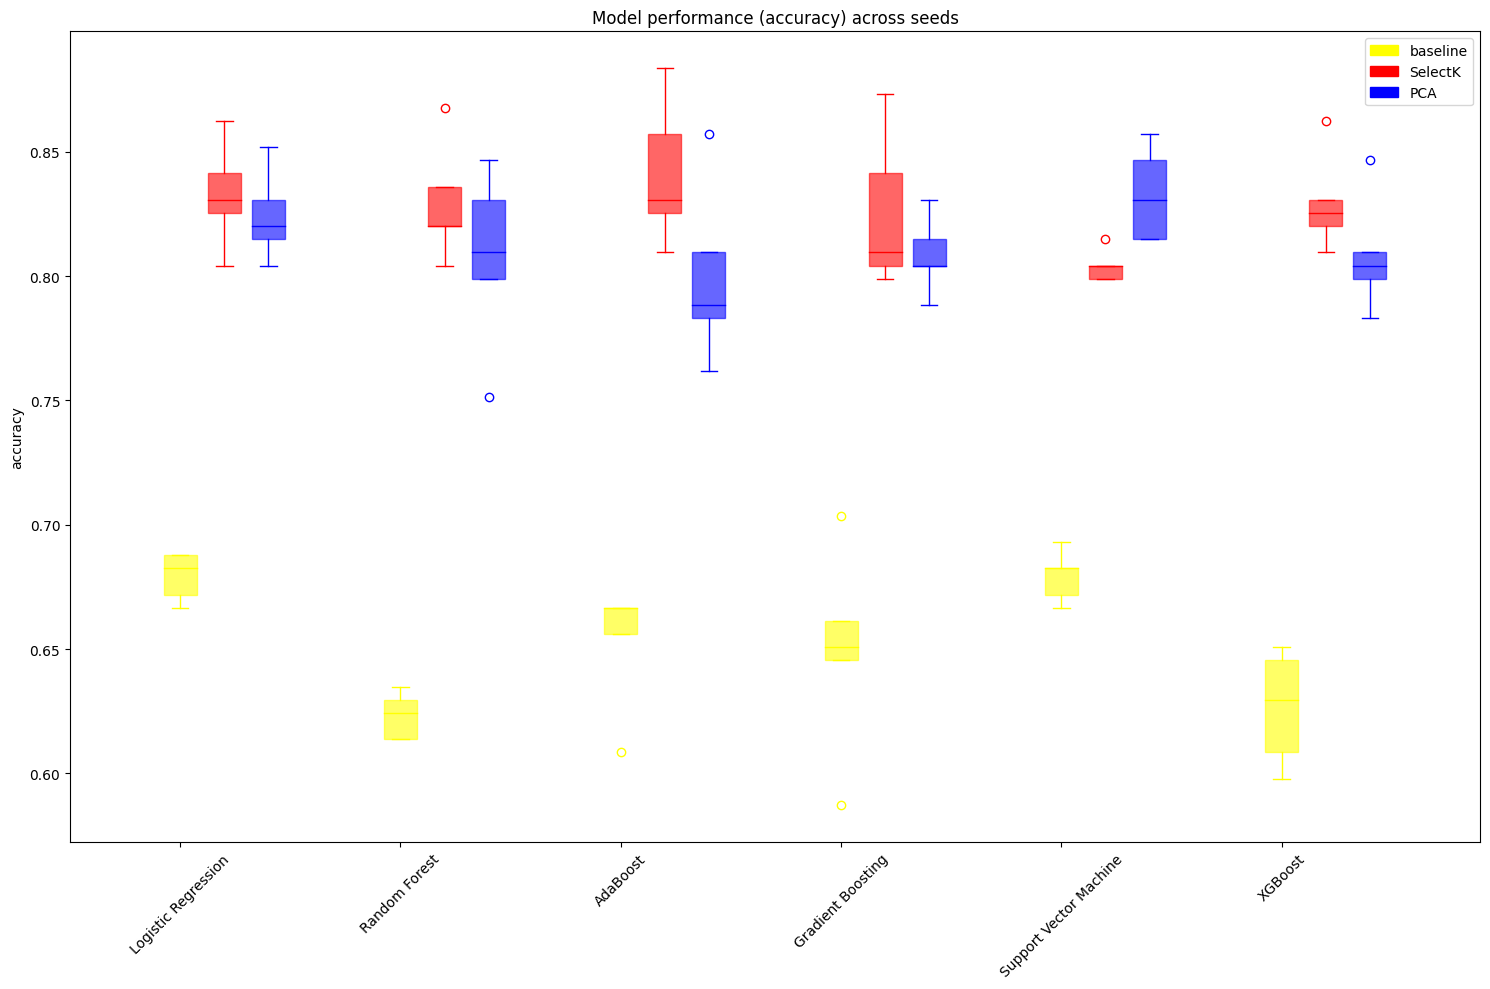

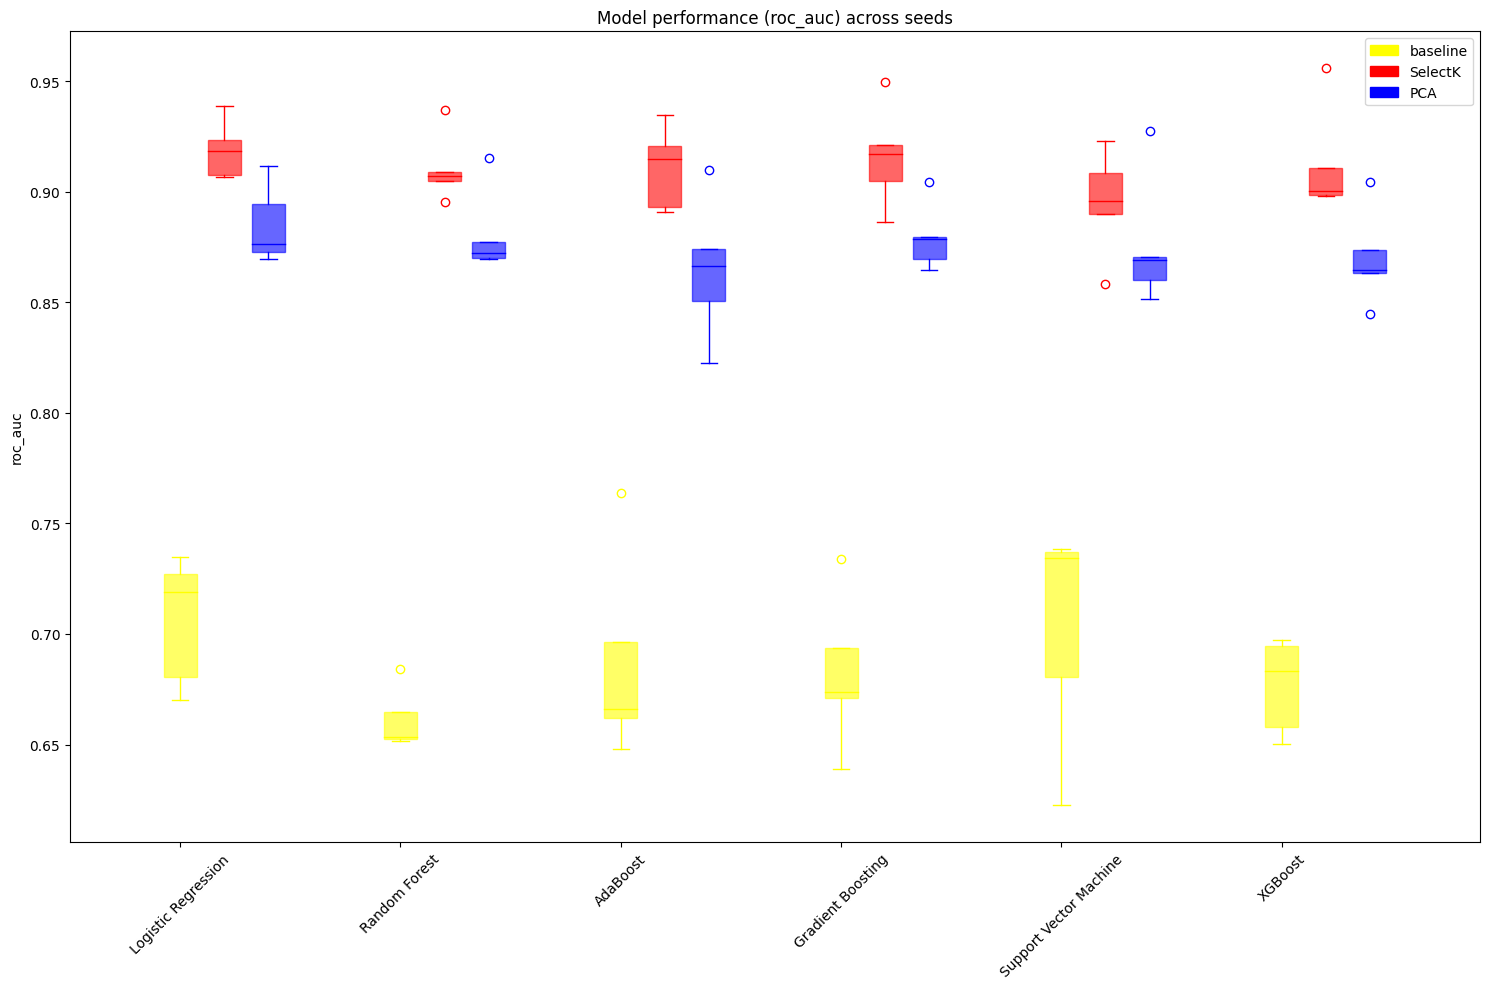

In [7]:
import openai
import time
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import re
import json
import datetime
from sklearn.metrics import accuracy_score, roc_auc_score
# Define the openai API key (Make sure to keep it confidential!)

# Utility functions
def get_matching_cols(df, regex):
    r = re.compile(regex)
    return list(filter(r.match, df.columns))

def get_embedding_cols(df):
    return get_matching_cols(df, "(vec_\d+)")

def explode(col, prefix):
    n_cols = len(col[0])
    col_names = [prefix + str(i) for i in range(n_cols)]
    return pd.DataFrame(col.to_list(), columns=col_names)

def method_baseline(df, scaler=None):
    X = df.drop('Outcome', axis=1)
    y = df['Outcome']
    X_cat = X[['Age', 'Sex', 'Height', 'Weight', 'Pregnancy status', 'Murmur', 'Most audible location', 'Systolic murmur timing', 'Systolic murmur shape', 'Systolic murmur grading', 'Systolic murmur pitch', 'Systolic murmur quality', 'Diastolic murmur timing', 'Diastolic murmur shape', 'Diastolic murmur grading', 'Diastolic murmur pitch', 'Diastolic murmur quality', 'Campaign', 'PV', 'TV', 'AV', 'MV']]
    
    if scaler is None:
        scaler = StandardScaler()
        X_final = scaler.fit_transform(X_cat)
    else:
        X_final = scaler.transform(X_cat)
    
    return X_final, y, scaler

def method_SelectK(df, scaler=None, selector=None):
    def explode(col, prefix):
        n_cols = len(col[0])
        col_names = [prefix + str(i) for i in range(n_cols)]
        return pd.DataFrame(col.to_list(), columns=col_names)

    # Explode text_vector
    exploded = explode(df['text_vector'], 'vec_')
    df.loc[:, exploded.columns] = exploded

    X = df.drop('Outcome', axis=1)
    y = df['Outcome']

    # Extract features
    X_cat = X[['Age', 'Sex', 'Height', 'Weight', 'Pregnancy status', 'Murmur', 'Most audible location', 'Systolic murmur timing', 'Systolic murmur shape', 'Systolic murmur grading', 'Systolic murmur pitch', 'Systolic murmur quality', 'Diastolic murmur timing', 'Diastolic murmur shape', 'Diastolic murmur grading', 'Diastolic murmur pitch', 'Diastolic murmur quality', 'Campaign', 'PV', 'TV', 'AV', 'MV']]
    embed_cols = get_embedding_cols(X)
    X_text = X[embed_cols]
    X_comb = pd.concat([X_cat, X_text], axis=1)

    # Scale the data
    if scaler is None:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_comb)
    else:
        X_scaled = scaler.transform(X_comb)

    # Feature selection
    if selector is None:
        selector = SelectKBest(mutual_info_classif, k=20)
        X_selected = selector.fit_transform(X_scaled, y)
    else:
        X_selected = selector.transform(X_scaled)

    X_final = pd.concat([X_cat, pd.DataFrame(X_selected)], axis=1)
    X_final.columns = X_final.columns.astype(str)

    return X_final, y, scaler, selector

def fit_PCA(train_df):
    # Exploding the embeddings into separate columns
    exploded = explode(train_df['text_vector'], 'vec_')
    train_df.loc[:, exploded.columns] = exploded
    
    # Splitting X and y
    X = train_df.drop('Outcome', axis=1)
    y = train_df['Outcome']

    # Separate original categorical features
    X_cat = X[['Age', 'Sex', 'Height', 'Weight', 'Pregnancy status', 'Murmur', 'Most audible location', 'Systolic murmur timing', 'Systolic murmur shape', 'Systolic murmur grading', 'Systolic murmur pitch', 'Systolic murmur quality', 'Diastolic murmur timing', 'Diastolic murmur shape', 'Diastolic murmur grading', 'Diastolic murmur pitch', 'Diastolic murmur quality', 'Campaign', 'PV', 'TV', 'AV', 'MV']]
    
    # Extract the text embeddings
    embed_cols = get_embedding_cols(X)
    X_text = X[embed_cols]

    # Combine the embeddings and the original set
    X_comb = pd.concat([X_cat, X_text], axis=1)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_comb)
    
# Applying PCA on the combined data
    best_n_components = None
    best_score = float('-inf')
    for n_components in range(1, 50):  # Checking all possible number of components
        pca = PCA(n_components=n_components)
        X_pca = pca.fit_transform(X_scaled)

        # Train a model (e.g., logistic regression) on the PCA components and compute the performance
        model2 = LogisticRegression()
        score = cross_val_score(model2, X_pca, y, cv=5, scoring='roc_auc').mean()

        if score > best_score:
            best_score = score
            best_n_components = n_components
    
    pca = PCA(n_components=best_n_components)
    pca.fit(X_scaled)
    return pca, best_n_components, scaler

def transform_with_PCA(pca,scaler, df):
 # Exploding the embeddings into separate columns
    exploded = explode(df['text_vector'], 'vec_')
    df.loc[:, exploded.columns] = exploded
    
    # Splitting X and y
    X = df.drop('Outcome', axis=1)
    y = df['Outcome']

    # Separate original categorical features
    X_cat = X[['Age', 'Sex', 'Height', 'Weight', 'Pregnancy status', 'Murmur', 'Most audible location', 'Systolic murmur timing', 'Systolic murmur shape', 'Systolic murmur grading', 'Systolic murmur pitch', 'Systolic murmur quality', 'Diastolic murmur timing', 'Diastolic murmur shape', 'Diastolic murmur grading', 'Diastolic murmur pitch', 'Diastolic murmur quality', 'Campaign', 'PV', 'TV', 'AV', 'MV']]
    
    # Extract the text embeddings
    embed_cols = get_embedding_cols(X)
    X_text = X[embed_cols]

    # Combine the embeddings and the original set
    X_comb = pd.concat([X_cat, X_text], axis=1)
    X_scaled = scaler.transform(X_comb)  # Only transform using the previously fitted scaler
    
    X_pca = pca.transform(X_scaled)
    X_final = pd.DataFrame(X_pca)
    X_final.columns = [f'PC{i+1}' for i in range(X_final.shape[1])]
    
    return X_final, df['Outcome']

def evaluate_models(train_df, test_df, models, methods):
    method_results = {}
    
    for method in methods:
        method_results[method] = {}

        if method == 'baseline':
            X_train, y_train, scaler = method_baseline(train_df)
            X_test, y_test, _ = method_baseline(test_df, scaler)
        elif method == 'PCA':
            pca, best_n_components, scaler = fit_PCA(train_df)
            X_train, y_train = transform_with_PCA(pca, scaler, train_df)
            X_test, y_test = transform_with_PCA(pca, scaler, test_df)
        elif method == 'SelectK':
            X_train, y_train, train_scaler, train_selector = method_SelectK(train_data)
            X_test, y_test, _, _ = method_SelectK(test_data, train_scaler, train_selector)

        for model_name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            for metric in metrics_list:
                if metric == 'accuracy':
                    score = accuracy_score(y_test, y_pred)
                elif metric == 'roc_auc':
                    y_prob = model.predict_proba(X_test)[:, 1]  # assuming binary classification
                    score = roc_auc_score(y_test, y_prob)

                if metric not in method_results[method]:
                    method_results[method][metric] = {}
                if model_name not in method_results[method][metric]:
                    method_results[method][metric][model_name] = []

                method_results[method][metric][model_name].append(score)

                print(f'Method: {method} | Model: {model_name} | {metric}: {score}')

    return method_results

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True), 
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
}
methods = ['baseline', 'SelectK', 'PCA']
colors = ['yellow', 'red', 'blue', 'red', 'cyan', 'magenta', 'yellow']  # Added more colors for potential expansion
metrics_list = ['accuracy', 'roc_auc']
# evaluate_models(train_data, test_data, models, methods)
seeds = [0, 1, 2, 3, 4]

# Store results for each seed
all_results = {}

for seed in seeds:
    print(f"Processing seed {seed}...")
    
    # Adjust the paths to load the data based on the current seed
    train_data = pd.read_csv(f'/data/chenxi/llm-feature-engeneering/src/Fine_tune/circor/data_seed_{seed}/train.csv')
    test_data = pd.read_csv(f'/data/chenxi/llm-feature-engeneering/src/Fine_tune/circor/data_seed_{seed}/test.csv')
    
    # Adjust the model name based on the current seed (model number is seed + 1)
    generator = EmbeddingGeneratorForNLPSequenceClassification.from_use_case(
        use_case="NLP.SequenceClassification",
        model_name=f"fine_tuned_model_circor{seed + 1}",
        tokenizer_max_length=512
    )
    
    train_data['text_vector'] = generator.generate_embeddings(text_col=train_data['response'])
    test_data['text_vector'] = generator.generate_embeddings(text_col=test_data['response'])
    
    # Evaluate the models and store the results
    seed_results = evaluate_models(train_data, test_data, models, methods)
    all_results[seed] = seed_results
output_json = {}

for method in methods:
    output_json[method] = {}
    for model_name in models.keys():
        scores = [all_results[seed][method]['roc_auc'][model_name][0] for seed in seeds]
        median_score = np.median(scores)
        std_score = np.std(scores)
        performance_str = f"{median_score:.4f} ± {std_score:.2f}"
        
        output_json[method][model_name] = {
            "performance": performance_str,
            "median": median_score
        }

# Save the JSON structure to a file
current_time = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
file_path = f"/data/chenxi/llm-feature-engeneering/src/Fine_tune/circor/runs/{current_time}.json"
with open(file_path, 'w') as file:
    json.dump(output_json, file, indent=4)

# Now, plot the combined results
for metric in metrics_list:
    plt.figure(figsize=(15, 10))
    
    x_ticks_positions = np.arange(len(models))
    for i, method in enumerate(methods):
        scores_for_all_models = []
        for j, model_name in enumerate(models.keys()):
            scores = [all_results[seed][method][metric][model_name][0] for seed in seeds]
            scores_for_all_models.append(scores)
        
        # Plot boxplots for all models for the current method
        bp = plt.boxplot(scores_for_all_models, positions=x_ticks_positions + i * 0.2, widths=0.15,
                         patch_artist=True, boxprops=dict(facecolor=colors[i], alpha=0.6))
        for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
            plt.setp(bp[element], color=colors[i])
        plt.setp(bp["boxes"], facecolor=colors[i])
        plt.setp(bp["fliers"], markeredgecolor=colors[i])
    
    plt.xticks(ticks=x_ticks_positions, labels=models.keys(), rotation=45)
    plt.legend(handles=[mpatches.Patch(color=colors[i], label=method) for i, method in enumerate(methods)], loc='upper right')
    plt.title(f"Model performance ({metric}) across seeds")
    plt.ylabel(metric)
    plt.tight_layout()
    
    # Save the figure
    plt.savefig(f"/data/chenxi/llm-feature-engeneering/src/Fine_tune/circor/runs/{metric}_{current_time}.png")
    plt.show()
